In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
%cd /content/drive/MyDrive/MITB/Applied Machine Learning/Group Project Submission/Fraud dataset

/content/drive/MyDrive/MITB/Applied Machine Learning/Group Project Submission/Fraud dataset


In [5]:
!pip install scipy

In [6]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from datetime import datetime
from plotly.subplots import make_subplots

Loading dataset

In [7]:
# Loading dataset
train_data = 'fraudTrain.csv'
train_df = pd.read_csv(train_data)
test_data ='fraudTest.csv'
test_df = pd.read_csv(test_data)

In [ ]:
train_df.shape

In [ ]:
# Preliminary eda
test_df.shape

(27235, 23)

Preliminary EDA

In [ ]:
# Preliminary eda
train_df.shape

(15593, 23)

In [ ]:
train_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,transaction_distance,fraud_likelihood_job,age,fraud_likelihood_age,address_multiple_card_flag,avg_amt,large_order,multiple_cards_large_orders,first_time_shopper,gender_numeric
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,...,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675.0,1.296675e+06,1.296675e+06,1296675.0,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,...,1.762789e+00,1.049839e-01,4.549688e+01,7.146849e-01,0.0,7.035104e+01,3.598149e-01,0.0,7.580928e-04,4.525513e-01
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,...,4.963113e-01,3.346767e-01,1.739702e+01,4.515646e-01,0.0,2.111535e+01,4.799462e-01,0.0,2.752306e-02,4.977437e-01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,...,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00,0.0,4.584808e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,...,2.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.0,5.601119e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,...,2.000000e+00,0.000000e+00,4.300000e+01,1.000000e+00,0.0,6.321657e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,...,2.000000e+00,0.000000e+00,5.700000e+01,1.000000e+00,0.0,8.134573e+01,1.000000e+00,0.0,0.000000e+00,1.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,...,2.000000e+00,2.000000e+00,9.500000e+01,1.000000e+00,0.0,1.656535e+02,1.000000e+00,0.0,1.000000e+00,1.000000e+00


In [ ]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Data imbalance exploration

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             35041 non-null  int64  
 1   trans_date_trans_time  35041 non-null  object 
 2   cc_num                 35041 non-null  int64  
 3   merchant               35041 non-null  object 
 4   category               35041 non-null  object 
 5   amt                    35041 non-null  float64
 6   first                  35041 non-null  object 
 7   last                   35041 non-null  object 
 8   gender                 35041 non-null  object 
 9   street                 35041 non-null  object 
 10  city                   35041 non-null  object 
 11  state                  35041 non-null  object 
 12  zip                    35041 non-null  int64  
 13  lat                    35041 non-null  float64
 14  long                   35041 non-null  float64
 15  ci

In [ ]:
# Data imbalance check
# Assuming 'is_fraud' contains 0 for genuine and 1 for fraud
labels=["Genuine","Fraud"]

# Count the occurrences of each category in the 'is_fraud' column
fraud_or_not = train_df["is_fraud"].value_counts().tolist()

# Prepare the values for the pie chart
values = [fraud_or_not[0], fraud_or_not[1]]

# Create the pie chart with the updated column reference
fig = px.pie(values=values, names=labels, width=700, height=400, color_discrete_sequence=["skyblue","black"],
             title="Fraud vs Genuine Transactions")

# Show the pie chart
fig.show()

<ipython-input-10-115821482116>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




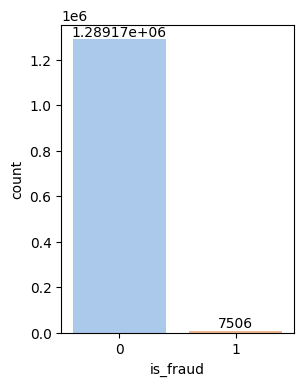

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud',data=train_df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
print('Genuine:', round(train_df['is_fraud'].value_counts()[0]/len(train_df) * 100,2), '% of the dataset')
print('Frauds:', round(train_df['is_fraud'].value_counts()[1]/len(train_df) * 100,2), '% of the dataset')

Genuine: 99.42 % of the dataset
Frauds: 0.58 % of the dataset


Checking distribution of all variables in dataset

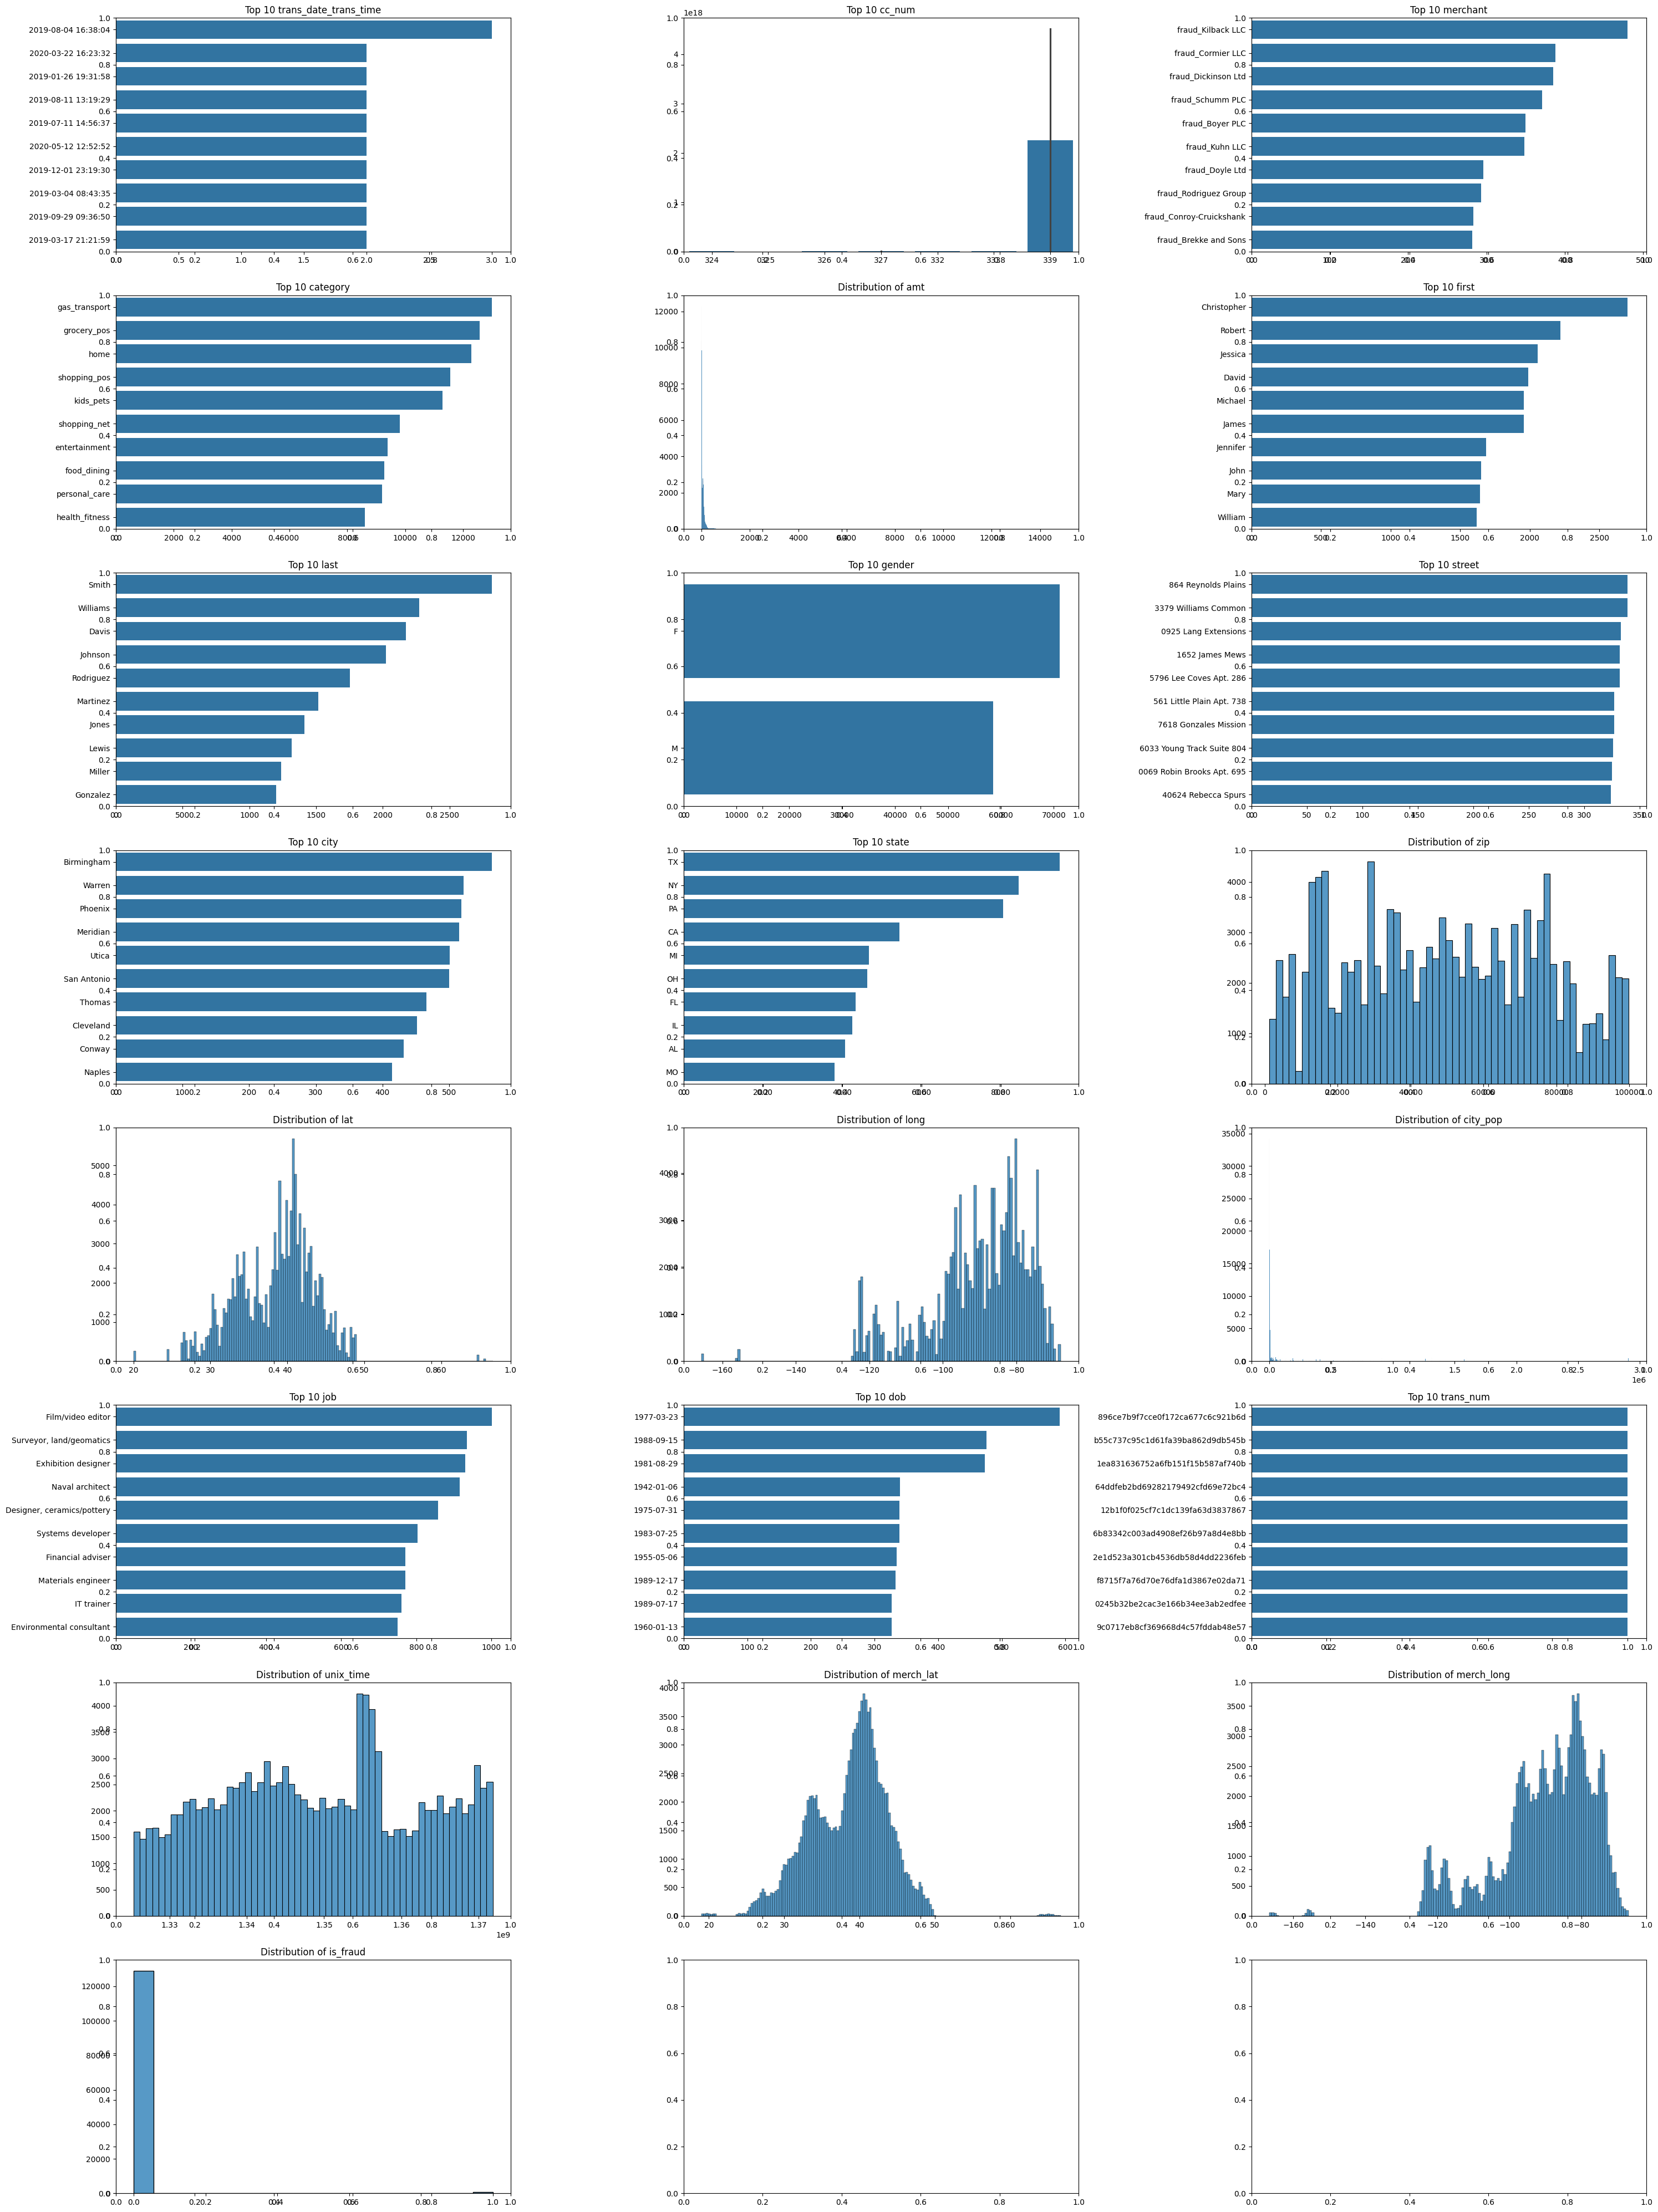

In [ ]:
def plot_distribution(data, cols=3, x_size=10, y_size=5, hspace=0.4, wspace=0.3, dpi=100):
    rows = (len(data.columns) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(x_size*cols, y_size*rows), dpi=dpi)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, column in enumerate(data.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        if data.dtypes[column] == 'object' or column in ['trans_date_trans_time', 'cc_num']:
            # If there are a lot of unique categories, we'll display the top 10
            top_categories = data[column].value_counts().nlargest(10)
            sns.barplot(x=top_categories, y=top_categories.index, ax=ax)
            ax.set_title(f'Top 10 {column}')
        else:
            sns.histplot(data[column], kde=False, ax=ax)
            ax.set_title(f'Distribution of {column}')
        ax.set_xlabel('')
        ax.set_ylabel('')
    plt.tight_layout()
    plt.show()

sample_data = train_df.sample(frac=0.1)  # Adjust the fraction as needed
plot_distribution(sample_data)

Fraud count by age comparison

In [ ]:
# Comparison
# Calculate age as of now for each entry
current_year = datetime.now().year
train_df['age'] = current_year - pd.to_datetime(train_df['dob']).dt.year

# Group by 'age' and 'is_fraud' and count the occurrences
grouped = train_df.groupby(['age', 'is_fraud']).size().reset_index(name='count')

# Separate the fraud and non-fraud data
fraud_data = grouped[grouped['is_fraud'] == 1]
non_fraud_data = grouped[grouped['is_fraud'] == 0]

# Create the subplots with separate y-axes for fraud and non-fraud
fig = make_subplots(rows=1, cols=2, subplot_titles=('Fraud Counts by Age', 'Non-Fraud Counts by Age'))

# Add fraud counts by age histogram
fig.add_trace(
    go.Bar(x=fraud_data['age'], y=fraud_data['count'], name='Fraud Counts', marker_color='red'),
    row=1, col=1
)

# Add non-fraud counts by age histogram
fig.add_trace(
    go.Bar(x=non_fraud_data['age'], y=non_fraud_data['count'], name='Non-Fraud Counts', marker_color='blue'),
    row=1, col=2
)

# Update the layout to include logarithmic y-axis for non-fraud counts
fig.update_yaxes(title_text="Fraud Counts", row=1, col=1)
fig.update_yaxes(title_text="Non-Fraud Counts", type="log", row=1, col=2)

# Update the layout for titles
fig.update_layout(title_text='Comparison of Fraud and Non-Fraud Counts by Age')

# Show the figure
fig.show()

In [ ]:
# Define age bins
bin_size = 10
bins = list(range(0, int(train_df['age'].max()) + bin_size, bin_size))

# Use pd.cut to bin ages in the DataFrame
train_df['age_bin'] = pd.cut(train_df['age'], bins, right=False)

# Convert the interval to string to be JSON serializable for Plotly
train_df['age_bin'] = train_df['age_bin'].astype(str)

# Now create separate data for fraud and non-fraud with these bins
grouped_fraud = train_df[train_df['is_fraud'] == 1].groupby('age_bin').size().reset_index(name='fraud_count')
grouped_non_fraud = train_df[train_df['is_fraud'] == 0].groupby('age_bin').size().reset_index(name='non_fraud_count')

# Create the subplots with separate y-axes for fraud and non-fraud
fig = make_subplots(rows=2, cols=2, subplot_titles=('Fraud Counts by Age', 'Non-Fraud Counts by Age',
                                                    'Binned Fraud Counts by Age', 'Binned Non-Fraud Counts by Age'))

# Add fraud counts by age histogram
fig.add_trace(go.Bar(x=grouped_fraud['age_bin'], y=grouped_fraud['fraud_count'], name='Fraud Counts', marker_color='red'), row=1, col=1)
# Add non-fraud counts by age histogram
fig.add_trace(go.Bar(x=grouped_non_fraud['age_bin'], y=grouped_non_fraud['non_fraud_count'], name='Non-Fraud Counts', marker_color='blue'), row=1, col=2)

# Add binned fraud counts by age histogram
fig.add_trace(go.Bar(x=grouped_fraud['age_bin'], y=grouped_fraud['fraud_count'], name='Binned Fraud Counts', marker_color='red'), row=2, col=1)
# Add binned non-fraud counts by age histogram
fig.add_trace(go.Bar(x=grouped_non_fraud['age_bin'], y=grouped_non_fraud['non_fraud_count'], name='Binned Non-Fraud Counts', marker_color='blue'), row=2, col=2)

# Update the layout to include logarithmic y-axis for non-fraud counts
fig.update_yaxes(title_text="Counts", row=1, col=1)
fig.update_yaxes(title_text="Counts", row=1, col=2)
fig.update_yaxes(title_text="Binned Counts", row=2, col=1)
fig.update_yaxes(title_text="Binned Counts", row=2, col=2)

# Update the layout for titles
fig.update_layout(title_text='Comparison of Fraud and Non-Fraud Counts by Age and Age Bins', barmode='overlay')

# Show the figure
fig.show()

In [ ]:
# Create the subplots with separate y-axes for fraud and non-fraud
fig = make_subplots(rows=1, cols=2, subplot_titles=('Fraud Counts by Age', 'Non-Fraud Counts by Age'))

# Add fraud counts by age histogram
fig.add_trace(go.Bar(x=grouped_fraud['age_bin'], y=grouped_fraud['fraud_count'], name='Fraud Counts', marker_color='red'), row=1, col=1)
# Add non-fraud counts by age histogram
fig.add_trace(go.Bar(x=grouped_non_fraud['age_bin'], y=grouped_non_fraud['non_fraud_count'], name='Non-Fraud Counts', marker_color='blue'), row=1, col=2)

# Update the layout to include logarithmic y-axis for non-fraud counts
fig.update_yaxes(title_text="Counts", row=1, col=1)
fig.update_yaxes(title_text="Counts", row=1, col=2)

# Update the layout for titles
fig.update_layout(title_text='Comparison of Fraud and Non-Fraud Counts by Age', barmode='overlay')

# Show the figure
fig.show()

In [ ]:
# Histogram
# Check the unique values in 'is_fraud'
print(train_df['is_fraud'].unique())

# Review the age calculation
print(train_df['age'].describe())

# Plot the distribution of 'age' to inspect it
import plotly.express as px
fig = px.histogram(train_df, x='age', color='is_fraud')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Frauds against time

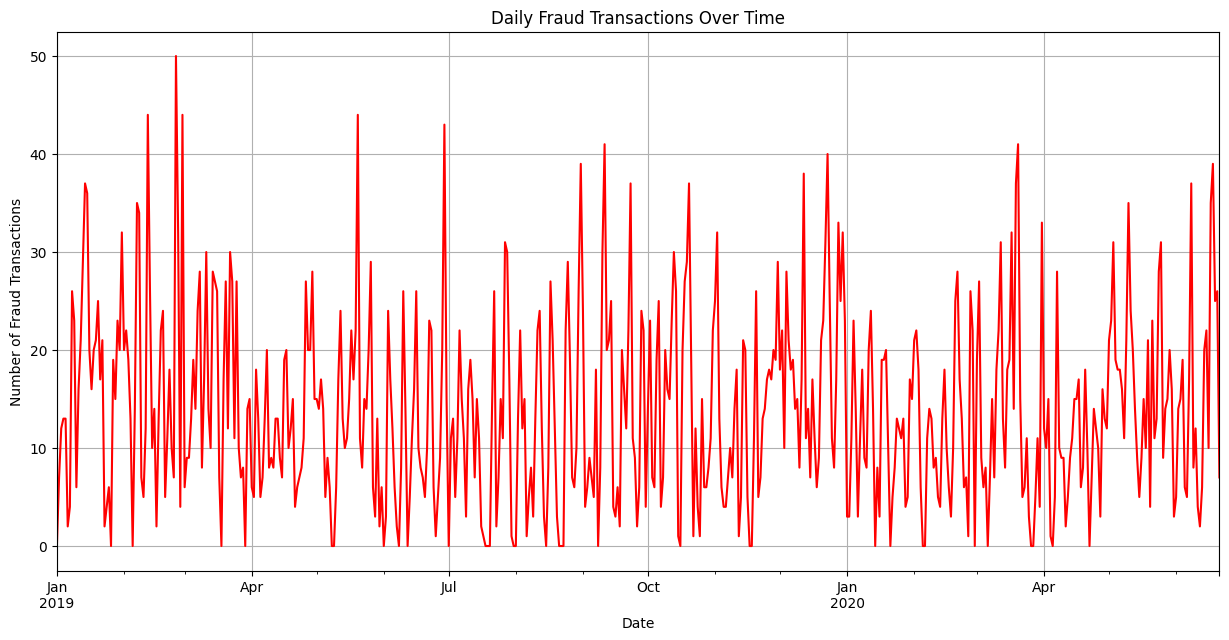

In [ ]:
# Step 1: Convert 'trans_date_trans_time' to datetime format
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])

# Step 2: Group by day (or the time unit of your choice)
# and aggregate with sum to get the number of fraud transactions per day
daily_fraud_transactions = train_df.resample('D', on='trans_date_trans_time')['is_fraud'].sum()

# Step 3: Plotting
plt.figure(figsize=(15, 7)) # Adjust size as needed
daily_fraud_transactions.plot(kind='line', color='red')
plt.title('Daily Fraud Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fraud Transactions')
plt.grid(True)
plt.show()

Distribution of "category" and "jobs" depending if they are fraud/non-fraud

"category"

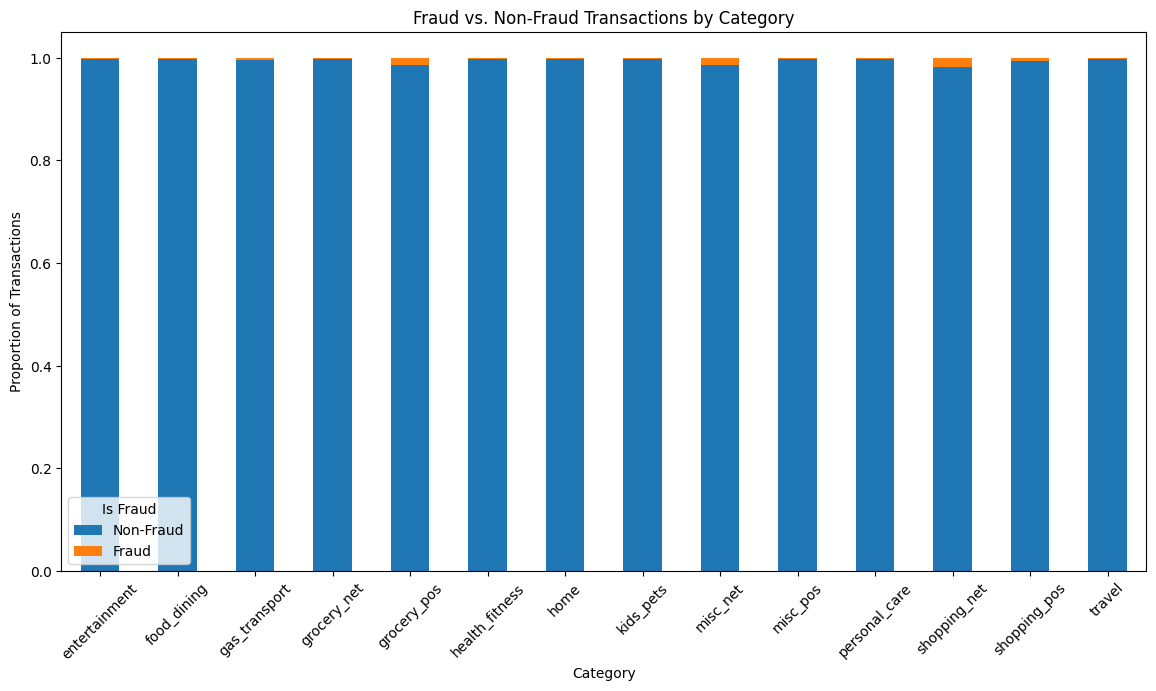

In [ ]:
# Group by 'category' and 'is_fraud', and count transactions
category_fraud_counts = train_df.groupby(['category', 'is_fraud']).size().unstack(fill_value=0)

# Plotting
category_fraud_proportions = category_fraud_counts.div(category_fraud_counts.sum(axis=1), axis=0)

category_fraud_proportions.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Fraud vs. Non-Fraud Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Proportion of Transactions')
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.show()

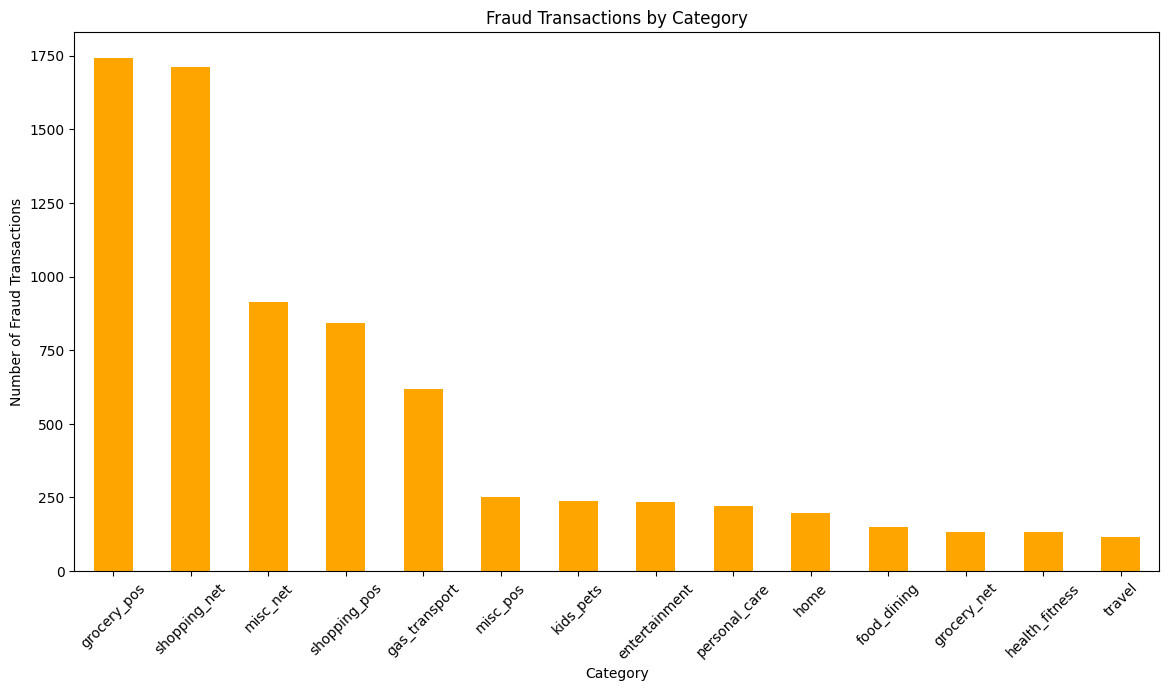

In [ ]:
# Group by 'category' and 'is_fraud', and count transactions
category_fraud_counts = train_df[train_df['is_fraud'] == 1].groupby('category').size()

# Sort the counts for better visibility
category_fraud_counts_sorted = category_fraud_counts.sort_values(ascending=False)

# Plotting only fraudulent transactions
plt.figure(figsize=(14, 7))
category_fraud_counts_sorted.plot(kind='bar', color='orange')
plt.title('Fraud Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.show()

"merchant"

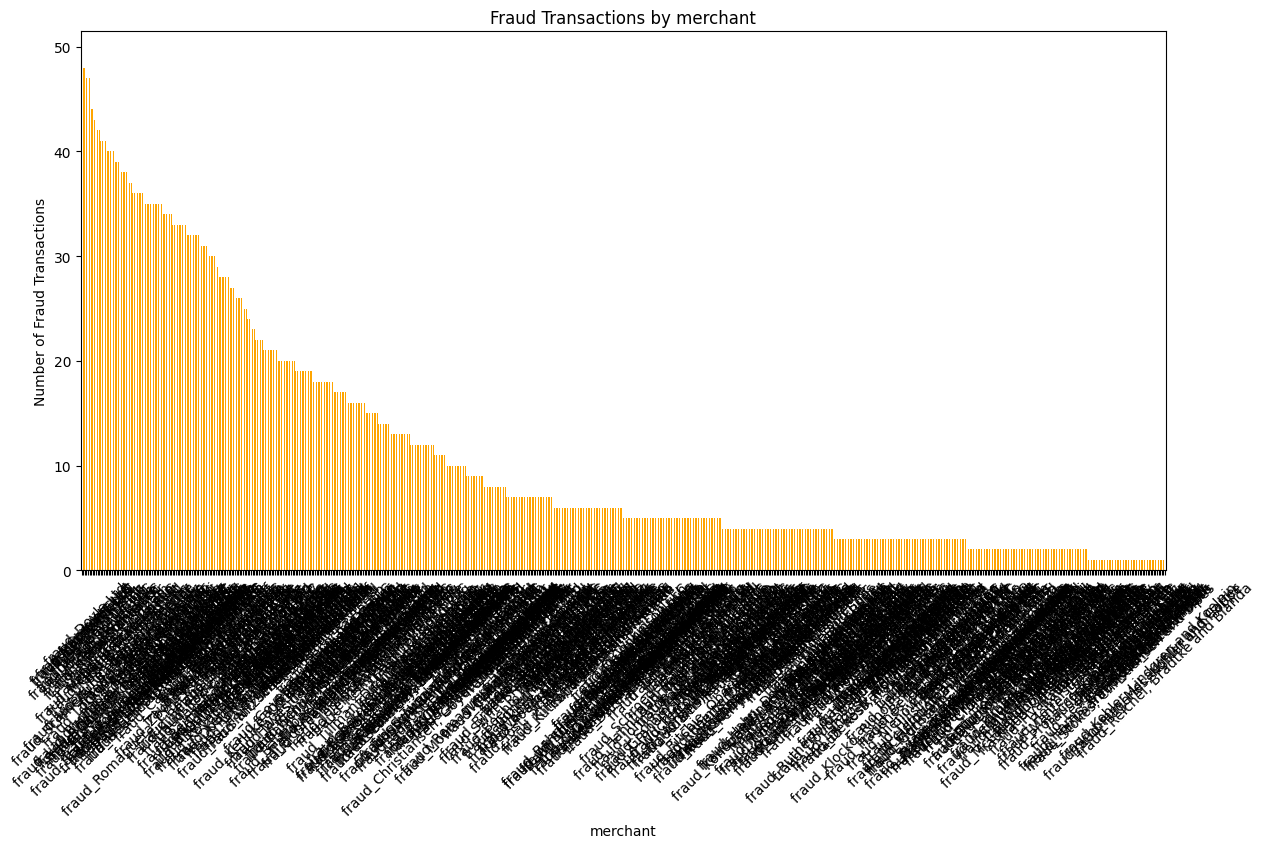

In [ ]:
# Group by 'merchant' and 'is_fraud', and count transactions
merchant_fraud_counts = train_df[train_df['is_fraud'] == 1].groupby('merchant').size()

# Sort the counts for better visibility
merchant_fraud_counts_sorted = merchant_fraud_counts.sort_values(ascending=False)

# Plotting only fraudulent transactions
plt.figure(figsize=(14, 7))
merchant_fraud_counts_sorted.plot(kind='bar', color='orange')
plt.title('Fraud Transactions by merchant')
plt.xlabel('merchant')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.show()

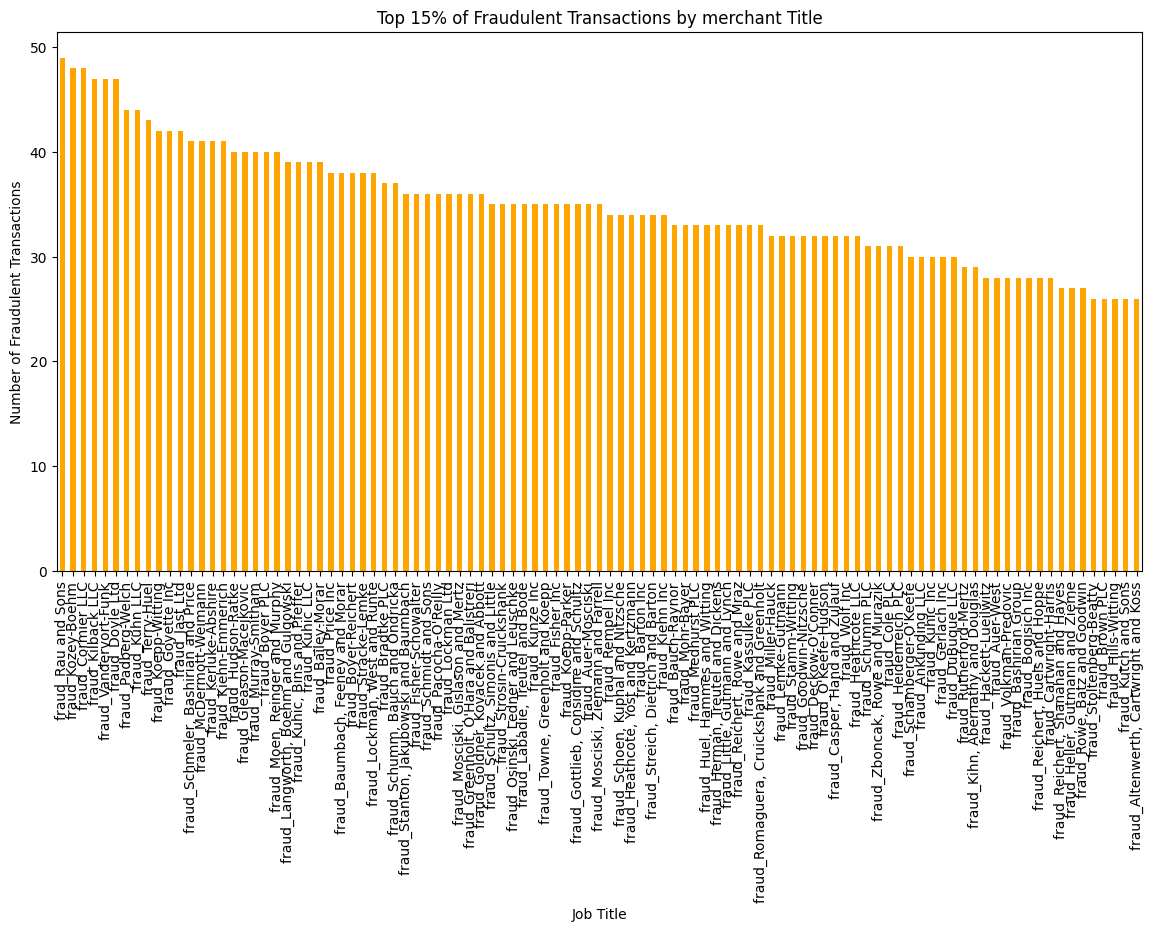

In [ ]:
# Assuming df is your DataFrame after loading your dataset
fraud_df = train_df[train_df['is_fraud'] == 1]

# Group by 'merchant' and count the number of fraud transactions
fraud_merchant_counts = fraud_df.groupby('merchant').size()

# Calculate the 75th percentile (top 25% cutoff)
cutoff = fraud_merchant_counts.quantile(0.85)

# Filter for merchant titles with fraud counts above the cutoff
top_fraud_merchant_counts = fraud_merchant_counts[fraud_merchant_counts > cutoff].sort_values(ascending=False)

# Plot the bar plot for the top 25% of fraudulent transactions
plt.figure(figsize=(14, 7))
top_fraud_merchant_counts.plot(kind='bar', color='orange')
plt.title('Top 15% of Fraudulent Transactions by merchant Title')
plt.xlabel('Job Title')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=90)
plt.show()

"job"

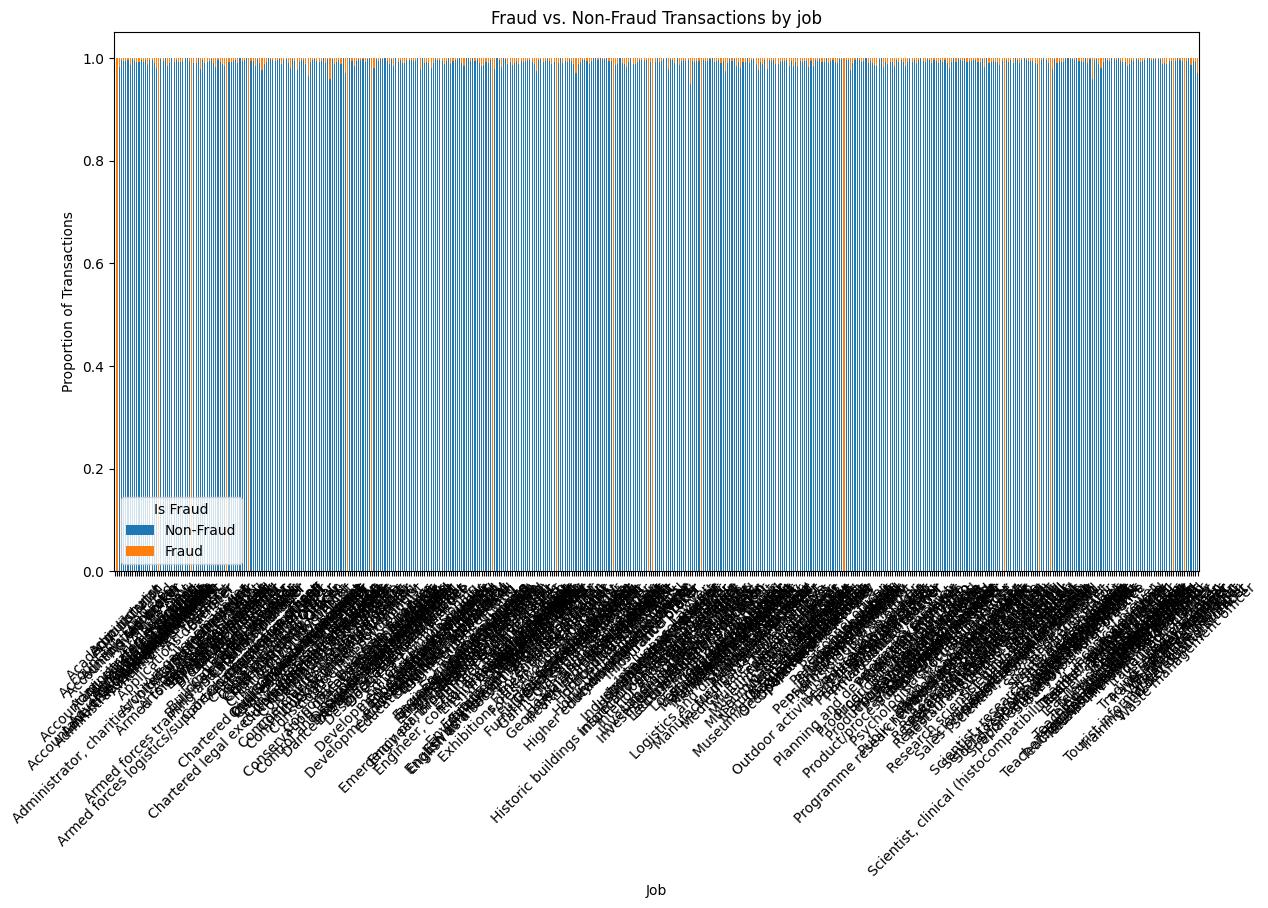

In [ ]:
# Group by 'job' and 'is_fraud', and count transactions
job_fraud_counts = train_df.groupby(['job', 'is_fraud']).size().unstack(fill_value=0)

# Plotting
job_fraud_proportions = job_fraud_counts.div(job_fraud_counts.sum(axis=1), axis=0)

job_fraud_proportions.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Fraud vs. Non-Fraud Transactions by job')
plt.xlabel('Job')
plt.ylabel('Proportion of Transactions')
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.show()

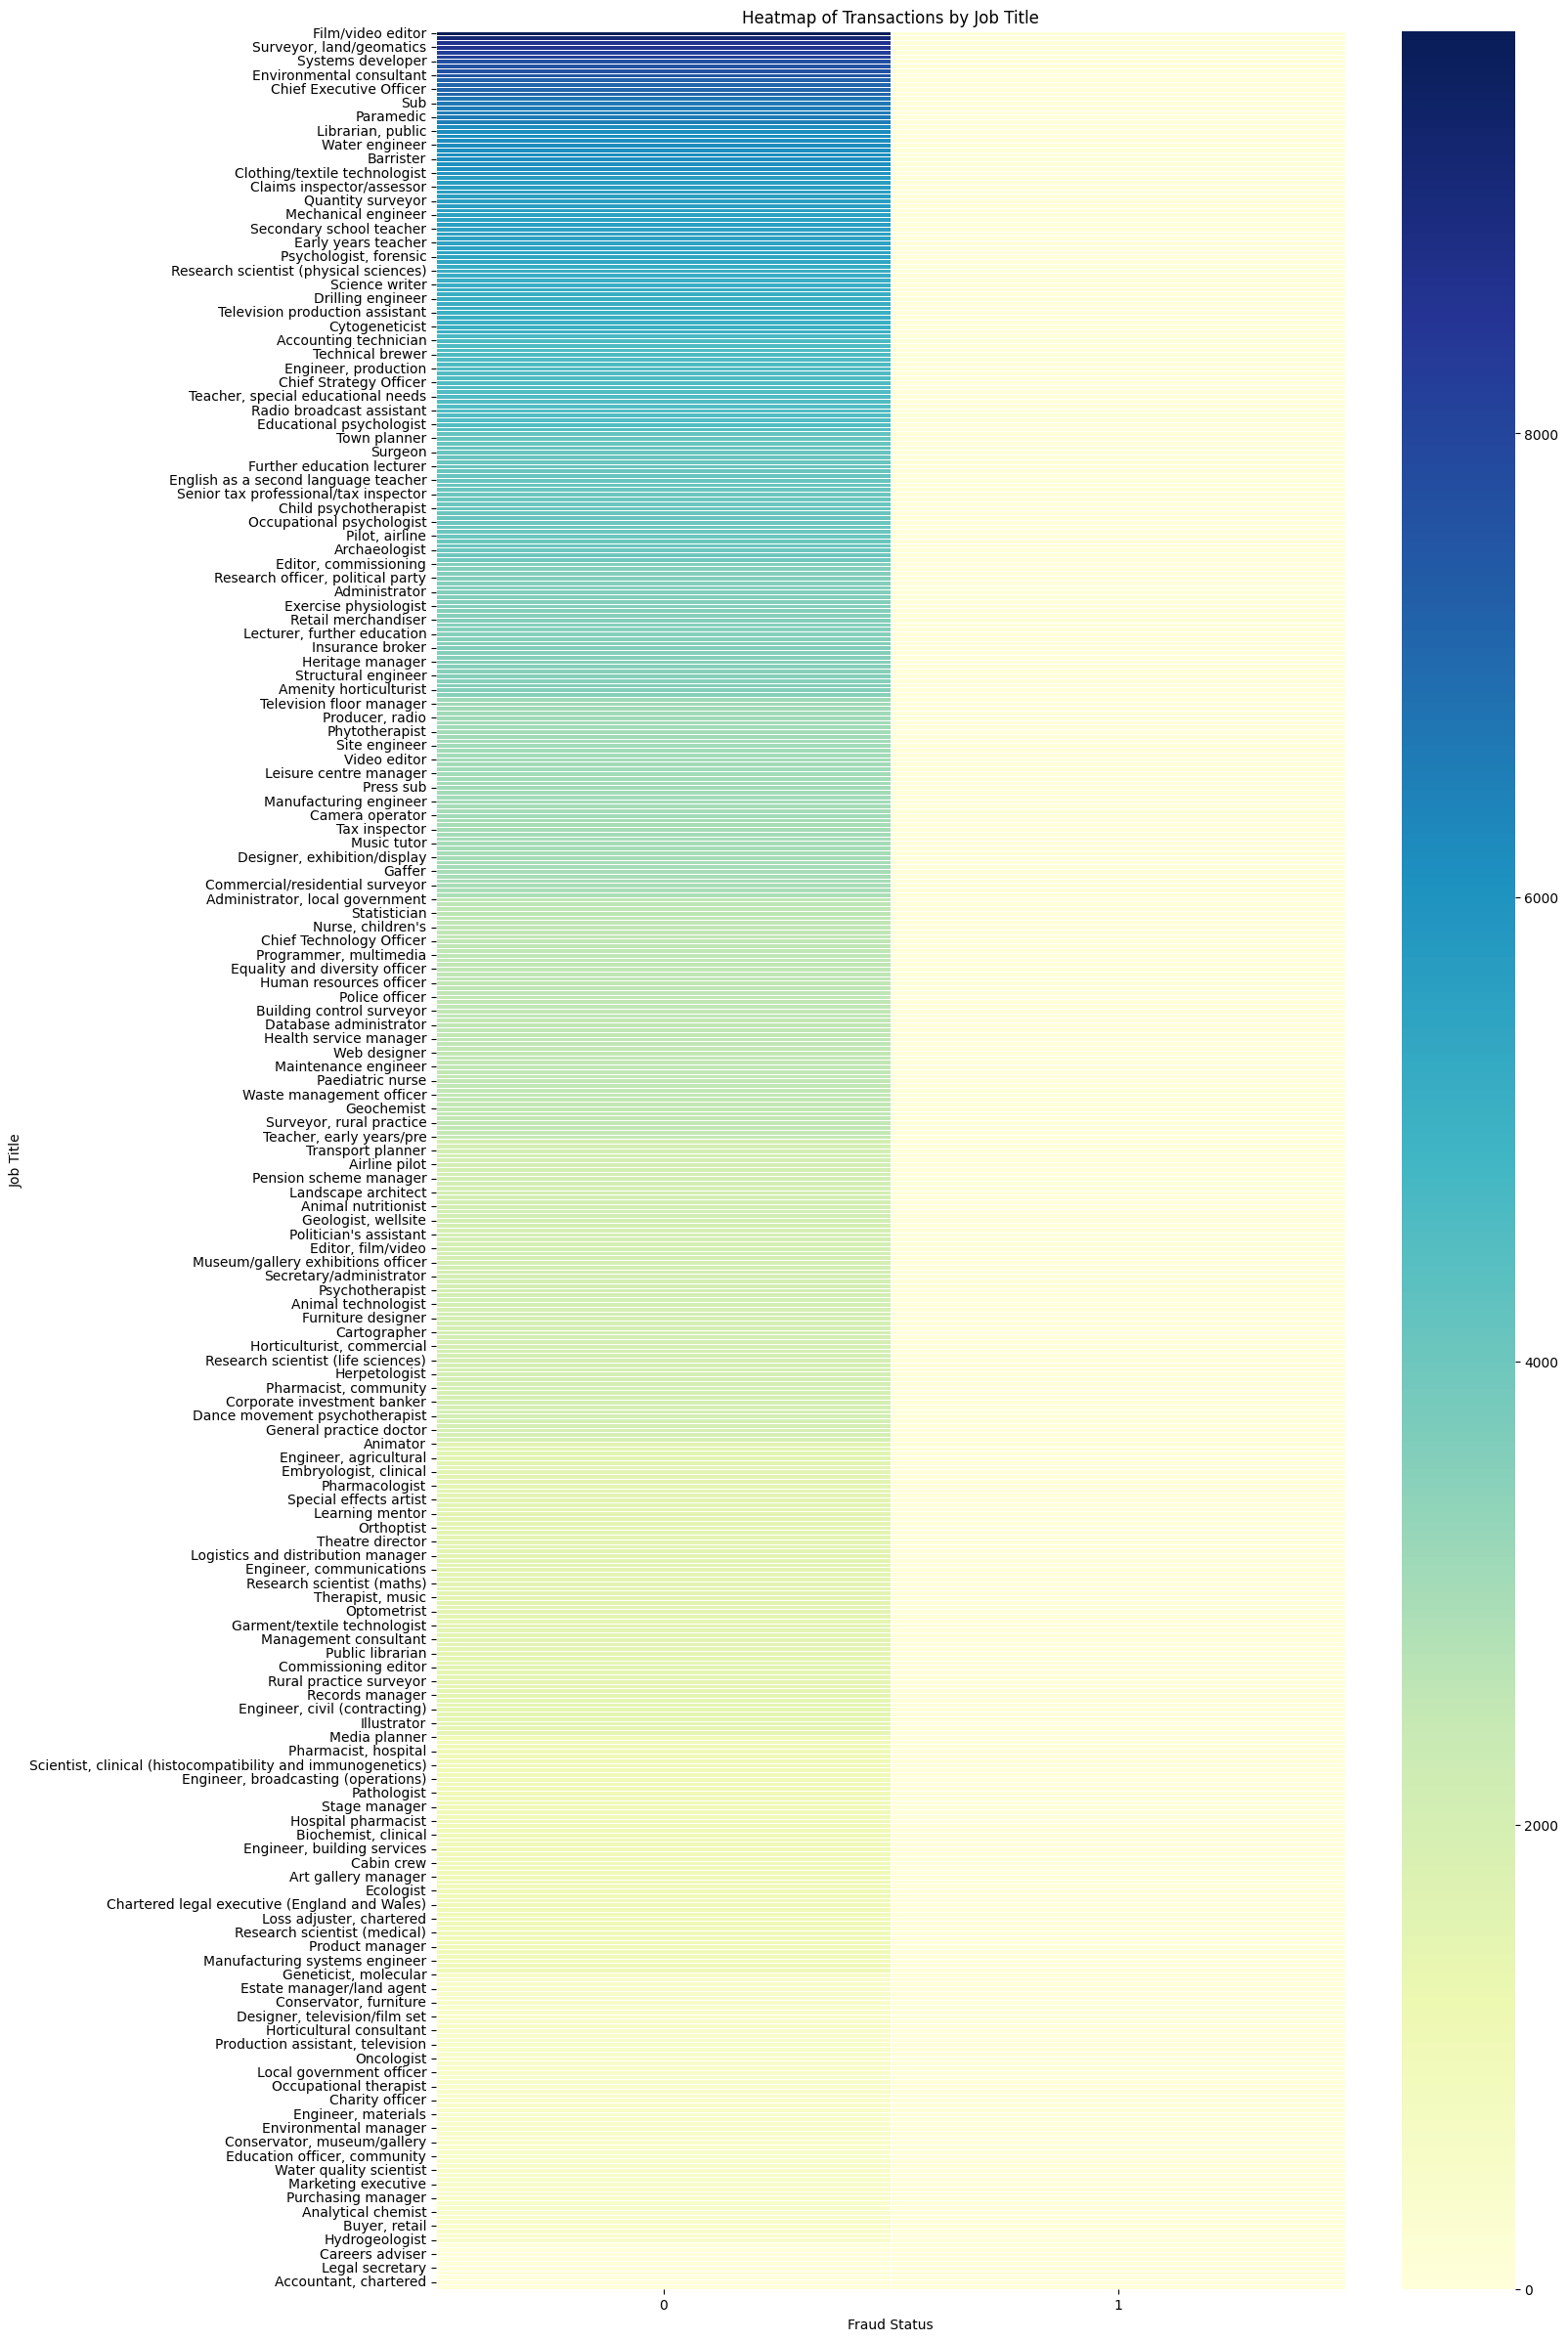

In [ ]:
# Filter out jobs with very few transactions to reduce clutter
# Here we are keeping only job titles with more than 10 transactions
job_transaction_counts = train_df['job'].value_counts()
jobs_to_keep = job_transaction_counts[job_transaction_counts > 10].index
df_filtered = train_df[train_df['job'].isin(jobs_to_keep)]

# Group by 'job' and 'is_fraud', then count transactions
job_fraud_counts = df_filtered.groupby(['job', 'is_fraud']).size().unstack(fill_value=0)

# Sort the jobs by total number of transactions for better readability
job_fraud_counts['Total'] = job_fraud_counts.sum(axis=1)
job_fraud_counts_sorted = job_fraud_counts.sort_values('Total', ascending=False).drop('Total', axis=1)

# Plot the heatmap with a larger figure size
plt.figure(figsize=(15, 30))  # You might need to adjust this depending on your screen and the number of jobs
sns.heatmap(job_fraud_counts_sorted, cmap='YlGnBu', linewidths=.5, annot=False)
plt.title('Heatmap of Transactions by Job Title')
plt.ylabel('Job Title')
plt.xlabel('Fraud Status')
plt.show()

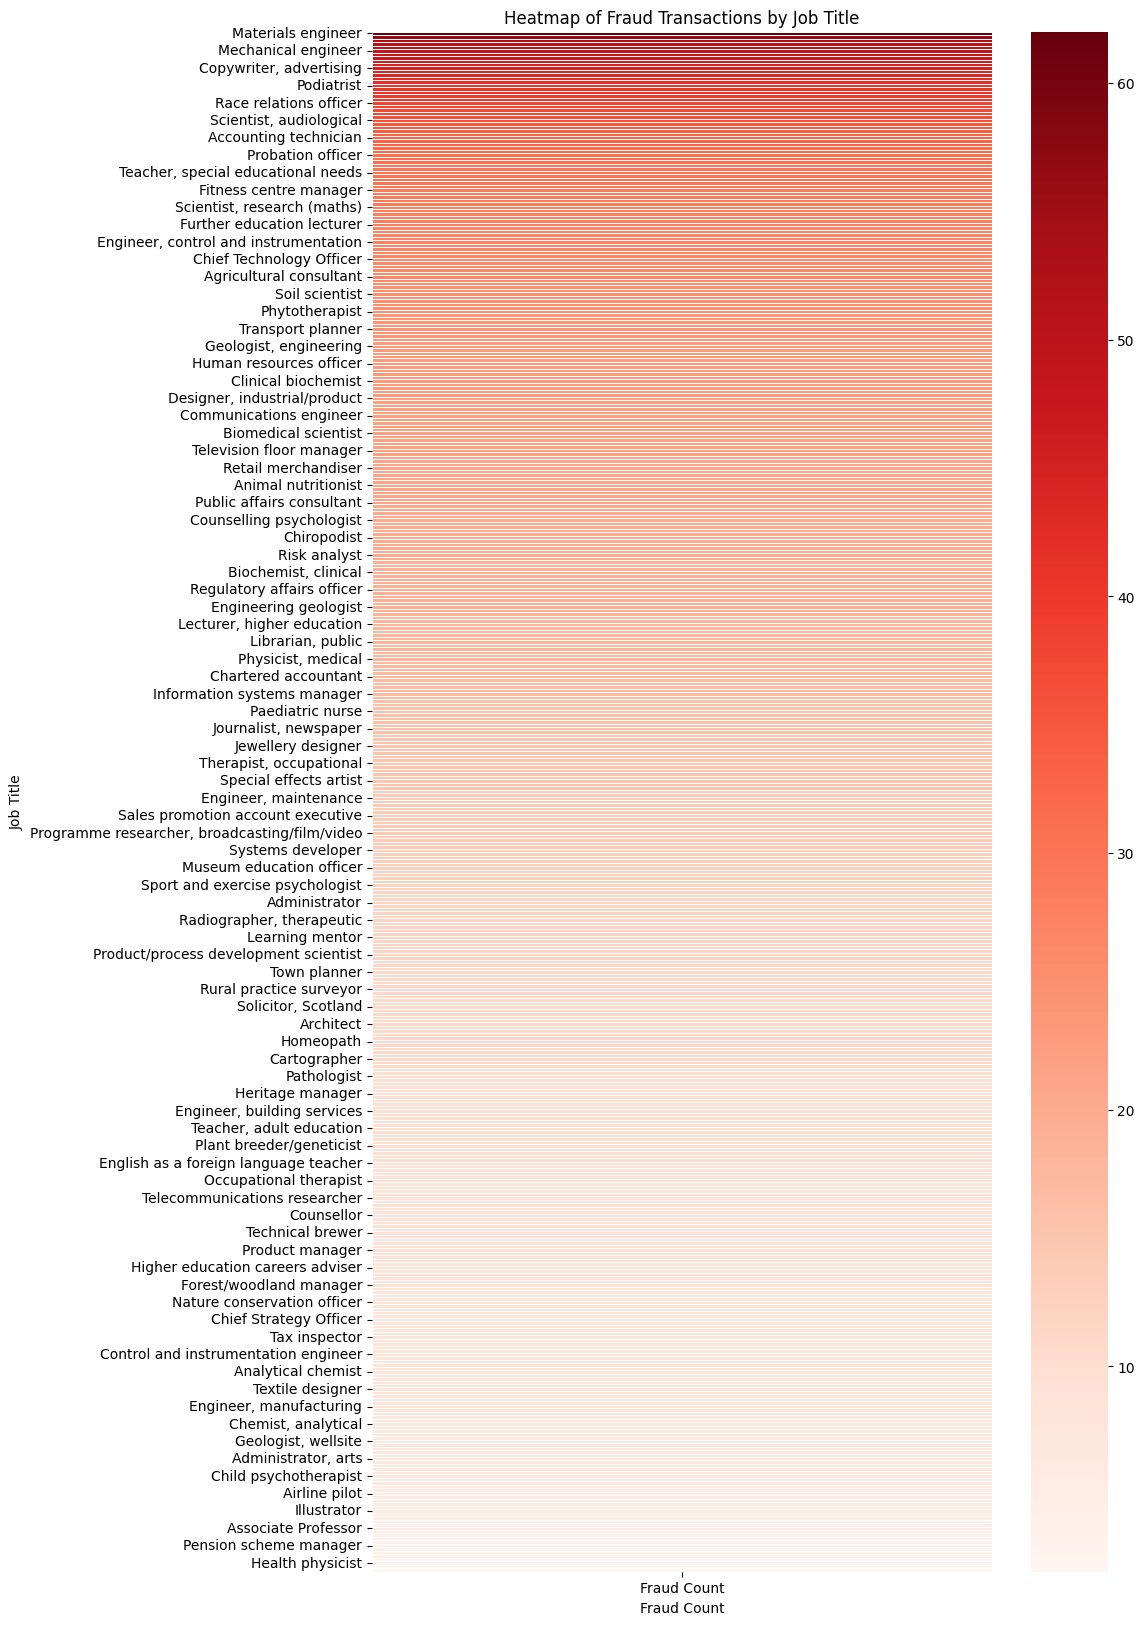

In [ ]:
# Filter the DataFrame to include only fraud transactions
fraud_df = train_df[train_df['is_fraud'] == 1]

# Group by 'job' and count the number of fraud transactions
# Since we're looking only at fraud cases, we don't need to unstack
fraud_job_counts = fraud_df.groupby('job').size()

# Sort the job titles by the count of fraud for better visibility
fraud_job_counts_sorted = fraud_job_counts.sort_values(ascending=False)

# Create a larger heatmap for fraud transactions only
plt.figure(figsize=(10, 20))  # Adjust the size to fit your number of job titles
sns.heatmap(fraud_job_counts_sorted.to_frame('Fraud Count'), annot=False, fmt="d", cmap='Reds', linewidths=.5)
plt.title('Heatmap of Fraud Transactions by Job Title')
plt.ylabel('Job Title')
plt.xlabel('Fraud Count')
plt.show()

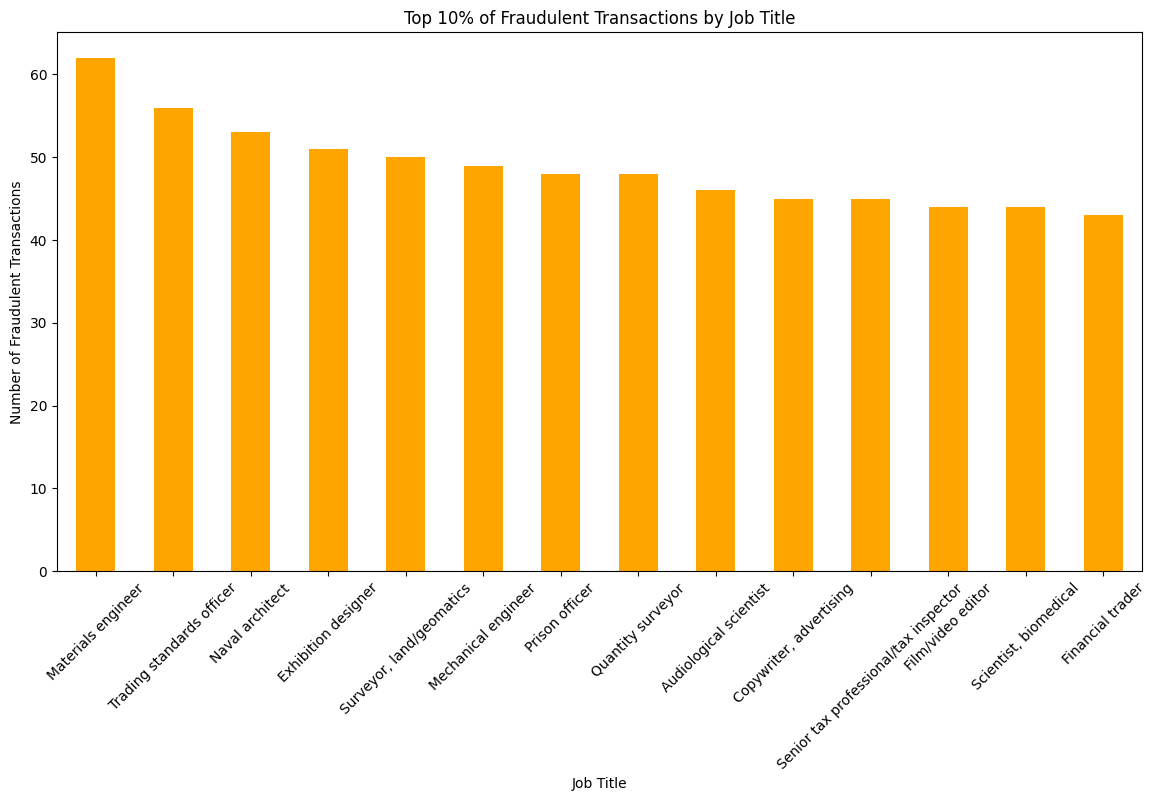

In [ ]:
# Assuming df is your DataFrame after loading your dataset
fraud_df = train_df[train_df['is_fraud'] == 1]

# Group by 'job' and count the number of fraud transactions
fraud_job_counts = fraud_df.groupby('job').size()

# Calculate the 75th percentile (top 25% cutoff)
cutoff = fraud_job_counts.quantile(0.97)

# Filter for job titles with fraud counts above the cutoff
top_fraud_job_counts = fraud_job_counts[fraud_job_counts > cutoff].sort_values(ascending=False)

# Plot the bar plot for the top 25% of fraudulent transactions
plt.figure(figsize=(14, 7))
top_fraud_job_counts.plot(kind='bar', color='orange')
plt.title('Top 10% of Fraudulent Transactions by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

Distance from customer to merchant vs fraud distribution

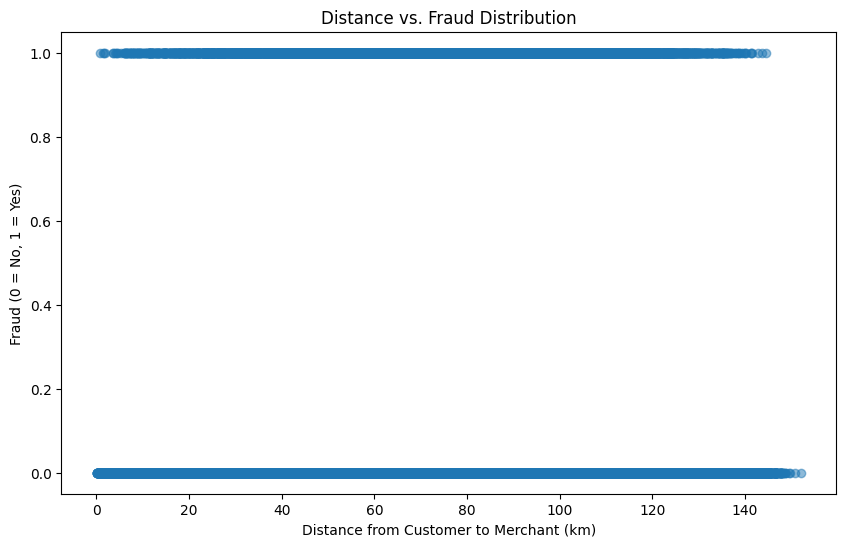

In [ ]:
# Function to calculate distance using Haversine formula
def calculate_distance(lat1, long1, lat2, long2):
    # Convert latitude and longitude from degrees to radians
    lat1, long1, lat2, long2 = map(np.radians, [lat1, long1, lat2, long2])

    # Haversine formula
    dlon = long2 - long1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # 6371 km is the radius of the Earth
    km = 6371 * c
    return km

# Calculate distances
train_df['distance'] = calculate_distance(train_df['lat'], train_df['long'], train_df['merch_lat'], train_df['merch_long'])

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(train_df['distance'], train_df['is_fraud'], alpha=0.5)
ax.set_xlabel('Distance from Customer to Merchant (km)')
ax.set_ylabel('Fraud (0 = No, 1 = Yes)')
ax.set_title('Distance vs. Fraud Distribution')
plt.show()

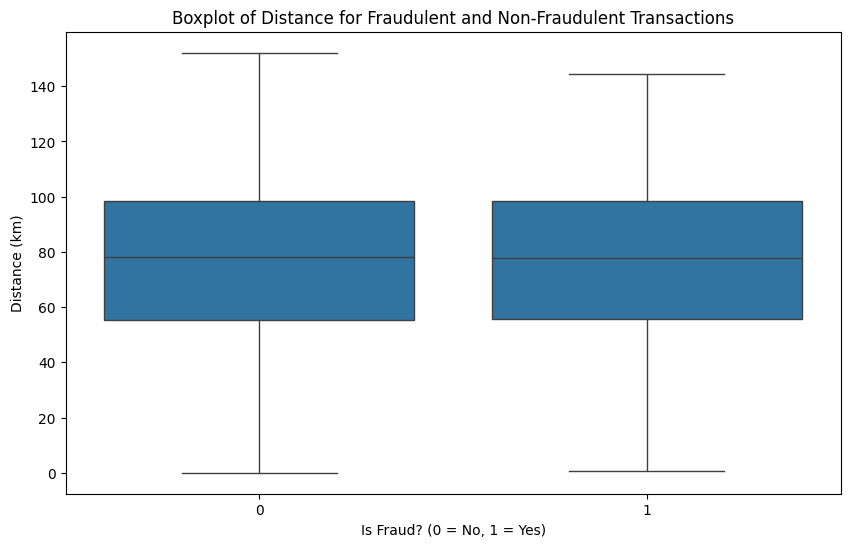

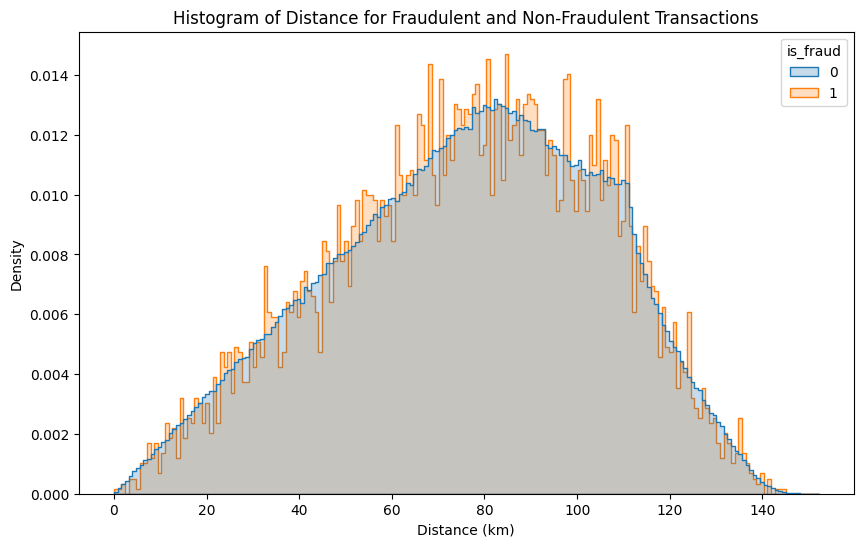

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='distance', data=train_df)
plt.title('Boxplot of Distance for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Is Fraud? (0 = No, 1 = Yes)')
plt.ylabel('Distance (km)')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='distance', hue='is_fraud', element='step', stat='density', common_norm=False)
plt.title('Histogram of Distance for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.show()

              count       mean        std       min        25%        50%  \
is_fraud                                                                    
0         1289169.0  76.113756  29.119051  0.022255  55.332701  78.233012   
1            7506.0  76.268330  28.752602  0.738769  55.632890  77.931954   

                75%         max  
is_fraud                         
0         98.504498  152.117173  
1         98.391090  144.522410  


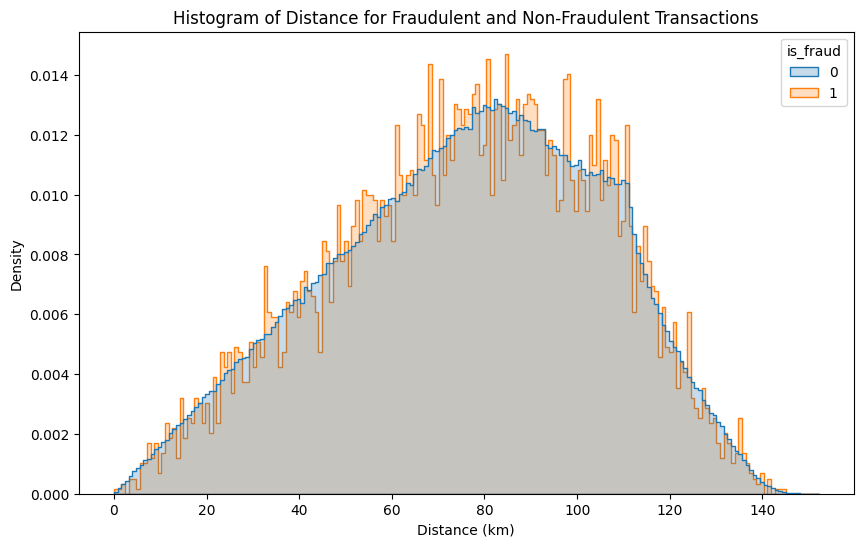

T-statistic: 0.4643763821022345, P-value: 0.642391418873082
The difference in mean distances is not statistically significant.


In [ ]:
# Descriptive statistics
print(train_df.groupby('is_fraud')['distance'].describe())

# Histogram and density plot
plt.figure(figsize=(10, 6))
sns.histplot(train_df, x='distance', hue='is_fraud', element='step', stat='density', common_norm=False)
plt.title('Histogram of Distance for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.show()

# Hypothesis Testing: Two-sample T-test
fraudulent = train_df[train_df['is_fraud'] == 1]['distance']
non_fraudulent = train_df[train_df['is_fraud'] == 0]['distance']

t_stat, p_value = stats.ttest_ind(fraudulent, non_fraudulent, equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference in mean distances is statistically significant.")
else:
    print("The difference in mean distances is not statistically significant.")